# DNN

### 상수 값으로 풀어보는 XOR  예제

![xor_nn_1](https://user-images.githubusercontent.com/661959/54298177-9e82f080-45fb-11e9-8bdd-1f86718c6f5d.png)




In [ ]:
import tensorflow as tf
import numpy as np

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
Y = np.array([[0], [1], [1], [0]], dtype=np.float32)


W1 = tf.Variable(np.array([[5,-7], [5,-7]], dtype=np.float32), name='weight1')
b1 = tf.Variable(np.array([[-8, 3]], dtype=np.float32), name='bias1')
L1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(np.array([[-11],[-11]], dtype=np.float32), name='weight2')
b2 = tf.Variable(np.array([6], dtype=np.float32), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(L1, W2) + b2)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = np.mean(predicted == Y)

print(f"\nHypothesis:\n{hypothesis} \nPredicted:\n{predicted} \nAccuracy:\n{accuracy}")


Hypothesis:
[[0.01118422]
 [0.99493575]
 [0.99493575]
 [0.02438853]] 
Predicted:
[[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:
1.0


#### XOR 문제 MLP 학습 예제
* 앞서 상수로 풀었던 XOR 문제를 MLP 학습으로 해결

In [ ]:
import tensorflow as tf
import numpy as np
tf.random.set_seed(777)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([[0], [1], [1], [0]], dtype=np.float32)

W1 = tf.Variable(tf.random.normal([2, 2], seed=0))
b1 = tf.Variable(tf.random.normal([2], seed=0))

W2 = tf.Variable(tf.random.normal([2, 1], seed=0))
b2 = tf.Variable(tf.random.normal([1], seed=0))

lr = 0.1
for step in range(10001):
    with tf.GradientTape() as tape:
        layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)
        hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)
        cost = tf.reduce_mean(tf.keras.losses.binary_crossentropy(y, hypothesis))
        d_W1, d_b1, d_W2, d_b2 = tape.gradient(cost, [W1, b1, W2, b2] )
        W1.assign_sub(d_W1 * lr)
        b1.assign_sub(d_b1 * lr)
        W2.assign_sub(d_W2 * lr)
        b2.assign_sub(d_b2 * lr)
        if step % 500 == 0:
            print(f"step:{step},\t cost:{cost}")

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = np.mean(predicted == Y)

print(f"Hypothesis:{hypothesis} \nPredicted:{predicted} \nAccuracy:{accuracy}")
print(f"w1:{W1.numpy()}, b1:{b1.numpy()}, w2:{W2.numpy()}, b2{b2.numpy()}")


step:0,	 cost:0.694770336151123
step:500,	 cost:0.6929008960723877
step:1000,	 cost:0.6907984018325806
step:1500,	 cost:0.6856606006622314
step:2000,	 cost:0.6681321859359741
step:2500,	 cost:0.6143724918365479
step:3000,	 cost:0.5017191171646118
step:3500,	 cost:0.30418720841407776
step:4000,	 cost:0.16250838339328766
step:4500,	 cost:0.10023440420627594
step:5000,	 cost:0.07013192772865295
step:5500,	 cost:0.05320870503783226
step:6000,	 cost:0.042575202882289886
step:6500,	 cost:0.03534672409296036
step:7000,	 cost:0.030143652111291885
step:7500,	 cost:0.026233481243252754
step:8000,	 cost:0.02319510281085968
step:8500,	 cost:0.020770292729139328
step:9000,	 cost:0.018792886286973953
step:9500,	 cost:0.017151057720184326
step:10000,	 cost:0.015767095610499382
Hypothesis:[[0.01526496]
 [0.9791965 ]
 [0.98642075]
 [0.01290689]] 
Predicted:[[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:1.0
w1:[[ 6.049177   6.122586 ]
 [-5.760254  -6.2778277]], b1:[ 2.8576014 -3.3210487], w2:[[-9.356798]
 [ 9.86822

### Optimizer 적용

In [ ]:
import tensorflow as tf
import numpy as np
tf.random.set_seed(777)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([[0], [1], [1], [0]], dtype=np.float32)

W1 = tf.Variable(tf.random.normal([2, 2], seed=0))
b1 = tf.Variable(tf.random.normal([2], seed=0))

W2 = tf.Variable(tf.random.normal([2, 1], seed=0))
b2 = tf.Variable(tf.random.normal([1], seed=0))

lr = 0.001
opt = tf.keras.optimizers.Adam(lr)
for step in range(5001):
    with tf.GradientTape() as tape:
        layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)
        hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)
        cost = tf.reduce_mean(tf.keras.losses.binary_crossentropy(y, hypothesis))
        d_W1, d_b1, d_W2, d_b2 = tape.gradient(cost, [W1, b1, W2, b2] )
        
        opt.apply_gradients(zip([d_W1, d_b1, d_W2, d_b2], [W1, b1, W2, b2]))
        if step % 500 == 0:
            print(f"step:{step},\t cost:{cost}")

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = np.mean(predicted == Y)

print(f"Hypothesis:{hypothesis} \nPredicted:{predicted} \nAccuracy:{accuracy}")
print(f"w1:{W1.numpy()}, b1:{b1.numpy()}, w2:{W2.numpy()}, b2{b2.numpy()}")


step:0,	 cost:0.694770336151123
step:500,	 cost:0.6866353750228882
step:1000,	 cost:0.6217808127403259
step:1500,	 cost:0.471736878156662
step:2000,	 cost:0.35258468985557556
step:2500,	 cost:0.2675657868385315
step:3000,	 cost:0.20677722990512848
step:3500,	 cost:0.1624651402235031
step:4000,	 cost:0.12943828105926514
step:4500,	 cost:0.1043068990111351
step:5000,	 cost:0.08483567833900452
Hypothesis:[[0.0850463 ]
 [0.9485386 ]
 [0.88753384]
 [0.07533149]] 
Predicted:[[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:1.0
w1:[[ 4.985145   5.509847 ]
 [-4.804452  -5.8524776]], b1:[ 3.007193 -2.878857], w2:[[-6.88032  ]
 [ 5.4160395]], b2[3.891959]


## Keras로 XOR 문제 해결하기


In [ ]:
import tensorflow as tf
import numpy as np
tf.random.set_seed(777)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([0, 1, 1, 0], dtype=np.float32)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation=tf.sigmoid, input_shape=(2,)), # 맨처음 inpu_shape 지정 필수(공통), 유닛수(출력수) 임의
    tf.keras.layers.Dense(1, activation=tf.sigmoid) # 마지막 Dense의 출력 1개(0,1 둘중하나, 이진분류), activation (sigmoid = 분류)
])
model.summary()
opt = tf.keras.optimizers.Adam()
model.compile(loss=tf.keras.losses.binary_crossentropy,  # 'binary_crossentropy'- 이진부류 이외 다항분류, 회귀
              optimizer=opt,
              metrics=[tf.keras.metrics.BinaryAccuracy()])
model.fit(X, y, epochs=5000, verbose=0)
model.evaluate(X, y)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 113ms/step - loss: 0.0965 - binary_accuracy: 1.0000


[0.0964551493525505, 1.0]

### Keras 문자열 설정 실습 – XOR 문제

In [ ]:
import tensorflow as tf
import numpy as np
tf.random.set_seed(777)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([0, 1, 1, 0], dtype=np.float32)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])  # 파라미터 지정 이게 편함. opt는 거의 adam
# adam이 loss가 낮아지도록 최소화, weight값의 등락을 결정, metrics는 검증용(정확도)
model.fit(X, y, epochs=5000, verbose=0) # verbose 중간과정 출력
model.evaluate(X, y)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 92ms/step - loss: 0.0965 - accuracy: 1.0000


[0.0964551493525505, 1.0]

In [ ]:
pred = model.predict([[0,0],[1,0],[0,1],[1,1]]) # predict() : 1이 될 확률 반환
np.where(pred<0.5 , 0 ,1) # 분류 결과 반환

array([[0],
       [1],
       [1],
       [0]])

In [ ]:
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[-4.828155 , -5.635682 ],
        [ 5.7990446,  5.5324607]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(2,) dtype=float32, numpy=array([ 2.5602846, -3.1628942], dtype=float32)>,
 <tf.Variable 'dense_3/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[-5.4648304],
        [ 5.7172065]], dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32, numpy=array([2.6617804], dtype=float32)>]

## 회귀 문제 실습 – 보스턴 주택 가격

In [ ]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import models, layers

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
print(X_train.shape, X_test.shape)
print(X_train[0])

mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std 

X_test -=mean 
X_test /=std
print(X_train[0])

model = models.Sequential() 
model.add(layers.Dense(64, activation='relu'
               , input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))     # 마지막 Dense의 activation 생략(linear기본), unit 기본 1
model.compile(optimizer='adam', loss='mse',metrics=['mae'])

history = model.fit(X_train, y_train ,epochs =50, batch_size=50, validation_split=0.2)
model.evaluate(X_test, y_test)  #score 같은거

65536/57026 [==================================] - 0s 0us/step
(404, 13) (102, 13)
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
Epoch 1/50
7/7 [==============================] - 1s 27ms/step - loss: 566.5267 - mae: 21.9305 - val_loss: 619.4521 - val_mae: 23.0522
Epoch 2/50
7/7 [==============================] - 0s 6ms/step - loss: 536.3302 - mae: 21.1826 - val_loss: 587.9424 - val_mae: 22.3237
Epoch 3/50
7/7 [==============================] - 0s 6ms/step - loss: 506.0338 - mae: 20.4029 - val_loss: 555.2315 - val_mae: 21.5357
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 474.1882 - mae: 19.5400 - val_loss: 518.7094 - val_mae: 20.6535
Epoch 5/50
7/7 [==============================] - 0s 6ms/step - loss: 439.1909 - mae: 18.582

[22.372358322143555, 3.407862424850464]

In [ ]:
y_train[0]  # 실제값

15.2

In [ ]:
# 예측값
model.predict([[-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266,  -0.1764426,  0.81306188,  0.1166983,  -0.62624905, -0.59517003,  1.14850044,  0.44807713,  0.8252202]])

array([[14.889994]], dtype=float32)

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


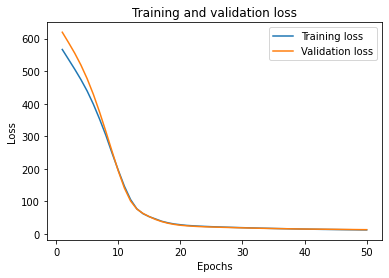

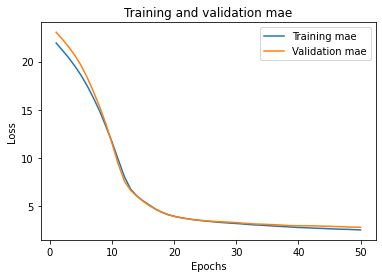

In [ ]:
import matplotlib.pyplot as plt

print(history.history.keys())
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(epochs, mae, label='Training mae')
plt.plot(epochs, val_mae, label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### 이진분류 실습 -  IMDB

In [ ]:
from tensorflow.keras.datasets import imdb

(train_data, y_train), (test_data, y_test) = imdb.load_data(num_words = 10000)
print(train_data.shape, test_data.shape)

17473536/17464789 [==============================] - 0s 0us/step
(25000,) (25000,)


In [ ]:
print(train_data[:2])
print(y_train[:2])

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i -3, '?') for i in train_data[0]])
decoded_review

1654784/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
import numpy as np

# 10000개의 단어 중에 review sample에서 사용한 단어만 1로 채우기
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
X_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer = 'rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train,
                   epochs=20, batch_size=512,
                   validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 16)                160016    
                                                                 
 dense_8 (Dense)             (None, 16)                272       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
40/40 [==============================] - 1s 22ms/step - loss: 0.5171 - accuracy: 0.8023 - val_loss: 0.4129 - val_accuracy: 0.8534
Epoch 2/20
40/40 [==============================] - 1s 15ms/step - loss: 0.3153 - accuracy: 0.9011 - val_loss: 0.3244 - val_accuracy: 0.8732
Epoch 3/20
40/40 [============

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### 시각화로 과적합 확인

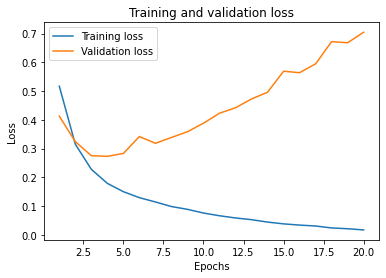

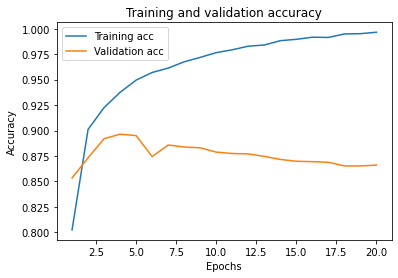

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Callback

In [ ]:
import datetime
import tensorflow as tf
import numpy as np
from tensorflow.keras import models, layers
class MyCustomCallback(tf.keras.callbacks.Callback):
    def on_train_batch_begin(self, batch, logs=None):
        print('Training: batch {} begins at {}'.format(batch, datetime.datetime.now().time()))

    def on_train_batch_end(self, batch, logs=None):
        print('Training: batch {} ends at {}'.format(batch, datetime.datetime.now().time()))

    def on_test_batch_begin(self, batch, logs=None):
        print('Evaluating: batch {} begins at {}'.format(batch, datetime.datetime.now().time()))

    def on_test_batch_end(self, batch, logs=None):
        print('Evaluating: batch {} ends at {}'.format(batch, datetime.datetime.now().time()))

cb = MyCustomCallback()
x = np.arange(10)
y = x * 2
    
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,), activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='mse')    
model.fit(x,y, callbacks=[cb])
model.evaluate(x,y, callbacks=[cb])

Training: batch 0 begins at 05:42:23.481862
Training: batch 0 ends at 05:42:23.815405
1/1 [==============================] - 0s 337ms/step - loss: 108.7212
Evaluating: batch 0 begins at 05:42:23.861913
Evaluating: batch 0 ends at 05:42:23.927346
1/1 [==============================] - 0s 82ms/step - loss: 108.4152


108.4151611328125

#### EarlyStopping Callback 적용

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
             metrics=['accuracy'])
cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
model.fit(X_train, y_train, epochs=20, batch_size=512, callbacks=[cb],  validation_split=0.2)
results = model.evaluate(X_test, y_test)

Epoch 1/20
40/40 [==============================] - 1s 22ms/step - loss: 0.4462 - accuracy: 0.7957 - val_loss: 0.3074 - val_accuracy: 0.8826
Epoch 2/20
40/40 [==============================] - 1s 15ms/step - loss: 0.2513 - accuracy: 0.9026 - val_loss: 0.2946 - val_accuracy: 0.8858
Epoch 3/20
40/40 [==============================] - 1s 15ms/step - loss: 0.1841 - accuracy: 0.9305 - val_loss: 0.2849 - val_accuracy: 0.8896
Epoch 4/20
40/40 [==============================] - 1s 16ms/step - loss: 0.1459 - accuracy: 0.9459 - val_loss: 0.3006 - val_accuracy: 0.8892
Epoch 5/20
782/782 [==============================] - 2s 3ms/step - loss: 0.3689 - accuracy: 0.8708


### 다항 분류 실습 -  MNIST 손글씨
#### Data loading

<class 'tuple'> 2
(60000, 28, 28) (10000,)
(10000, 28, 28) (10000,)
[5 0 4 1 9]


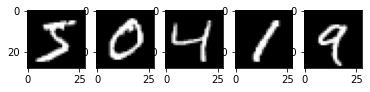

In [42]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

mnist = tf.keras.datasets.mnist.load_data()
print(type(mnist), len(mnist))

(X_train, y_train), (X_test, y_test) = mnist
print(X_train.shape, y_test.shape)
print(X_test.shape, y_test.shape)

print(y_train[:5])
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_train[i], cmap="gray")


In [43]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

#### Data preprocessing
* 정규화(Normalization) - 모든 칼럼이 하나의 정보
    * 픽셀 데이타 : 0 ~ 255
    * 정규화 데이타 : 0 ~ 1  
* 2차원 이미지를 1차원으로 변경
    * (28,28)
    * (784)

In [44]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
(X_train, X_test) = (np.float32(X_train)/255, np.float32(X_test)/255)

n_input = 28*28
(X_train, X_test) = (X_train.reshape(-1, n_input), X_test.reshape(-1, n_input))

#### Neural Net 설계
* 입력 : 28*28
* layer1 : 300
* layer2 : 100
* 출력 : 10

In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='relu', input_shape=(28*28,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')])
model.summary()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=100,
                    epochs=10,
                    validation_split=0.2)

test_scores = model.evaluate(X_test, y_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 300)               235500    
                                                                 
 dense_20 (Dense)            (None, 100)               30100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_21 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
480/480 [==============================] - 2s 4ms/step - loss: 0.4072 - accuracy: 0.8797 - val_loss: 0.1466 - val_accuracy: 0.9574
Epoch 2/10
480/480 [==================

#### 직접 쓴 숫자 prediction

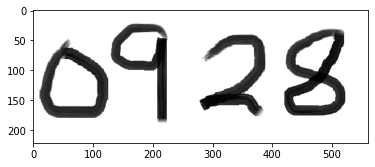

[[9.9997437e-01 9.9703215e-08 3.8509652e-06 5.9398070e-07 1.0245165e-07
  1.4333009e-05 2.6071698e-06 1.6574265e-06 1.7006371e-08 2.4211786e-06]] [0]
[[7.4911480e-11 7.0933908e-07 9.9999475e-01 2.1240037e-06 6.4905178e-12
  6.4308758e-12 5.6132782e-14 2.2501144e-06 1.2284428e-07 5.3907984e-10]] [2]
[[2.8888385e-07 1.4160529e-05 8.7607168e-06 9.3867001e-04 2.8303209e-06
  7.9087732e-07 1.2244671e-07 3.5541657e-07 9.9896324e-01 7.0760929e-05]] [8]
[[1.9887539e-06 1.5588144e-03 1.7882702e-06 8.4234811e-02 2.1383496e-02
  8.9481937e-06 3.4144961e-08 4.8422309e-05 8.9552678e-02 8.0320907e-01]] [9]


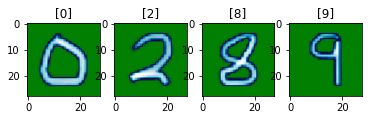

In [68]:
import numpy as np
import cv2
import img2data
import matplotlib.pyplot as plt


img_path = './0928.png'

image = cv2.imread(img_path)
plt.imshow(image)
plt.show()

numbers = img2data.img2digits(image, (28,28), border=4)
for i, n in enumerate(numbers):
    pred = model.predict(n.astype(np.float32)/255.0)
    pred_label = np.argmax(pred, axis=1)
    print(pred, pred_label)
    plt.subplot(1, len(numbers), i+1)
    plt.title(str(pred_label))
    plt.imshow(n.reshape(28,28), cmap="ocean")